In [1]:
install.packages(c("caret", "rpart", "rpart.plot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
library(caret)
library(rpart)
library(rpart.plot)


Loading required package: ggplot2

Loading required package: lattice



In [14]:
data <- airquality

In [15]:
print("Dataset Preview:")
head(data)

[1] "Dataset Preview:"


,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [16]:

print("Dataset Structure:")
str(data)

[1] "Dataset Structure:"
'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [17]:

print("Column Names:")
names(data)


[1] "Column Names:"


[1] "Ozone"   "Solar.R" "Wind"    "Temp"    "Month"   "Day"

In [18]:
colSums(is.na(data))

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

In [19]:
data$Ozone[is.na(data$Ozone)] <- mean(data$Ozone, na.rm = TRUE)
data$Solar.R[is.na(data$Solar.R)] <- mean(data$Solar.R, na.rm = TRUE)

In [20]:
print("Summary Statistics:")
summary(data)


[1] "Summary Statistics:"


     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 21.00   1st Qu.:120.0   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 42.13   Median :194.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 46.00   3rd Qu.:256.0   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  

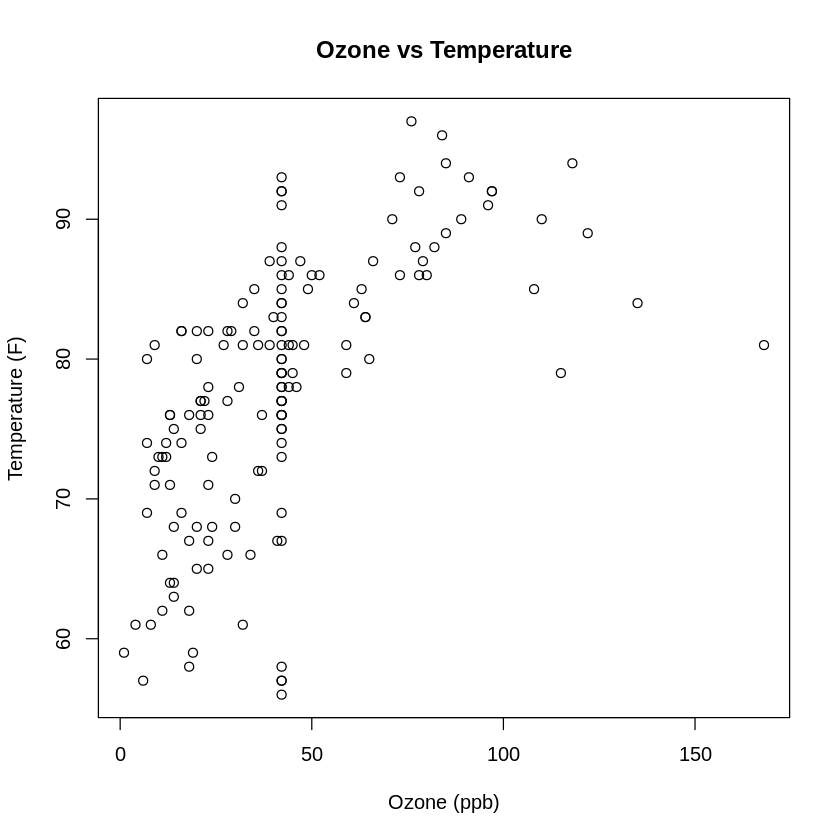

In [21]:
plot(data$Ozone, data$Temp,
     main = "Ozone vs Temperature",
     xlab = "Ozone (ppb)",
     ylab = "Temperature (F)")

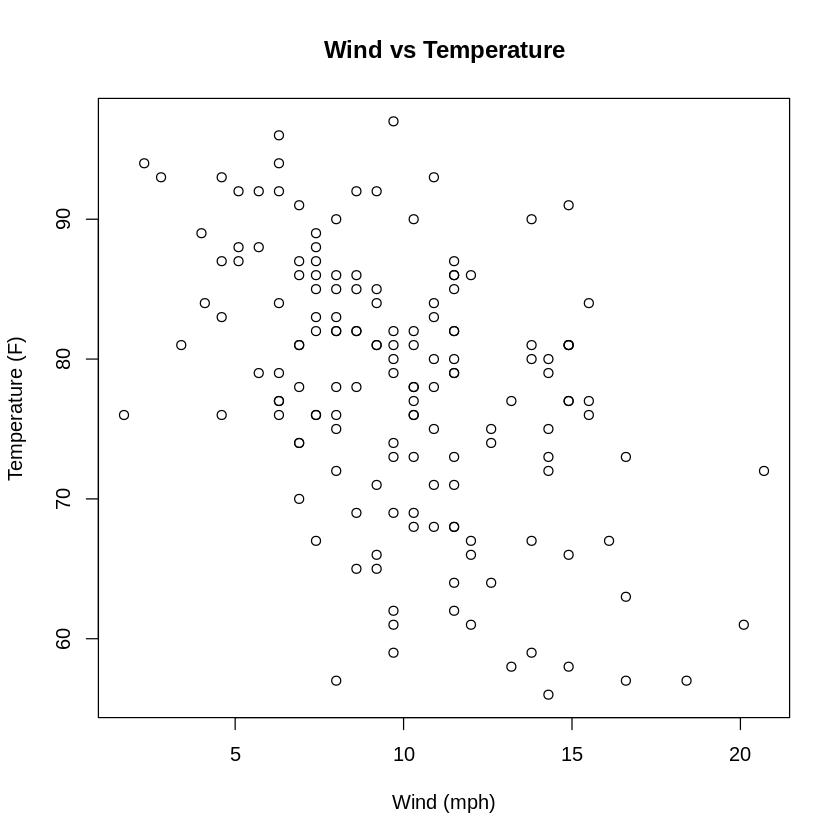

In [22]:
plot(data$Wind, data$Temp,
     main = "Wind vs Temperature",
     xlab = "Wind (mph)",
     ylab = "Temperature (F)")

In [23]:
print("Correlation Matrix:")
cor(data[, c("Ozone", "Solar.R", "Wind", "Temp")])

[1] "Correlation Matrix:"


,Ozone,Solar.R,Wind,Temp
Ozone,1.0000000,0.30296951,-0.53093584,0.6087420
Solar.R,0.3029695,1.00000000,-0.05524488,0.2625689
Wind,-0.5309358,-0.05524488,1.00000000,-0.4579879
Temp,0.6087420,0.26256886,-0.45798788,1.0000000


In [24]:
model <- lm(Ozone ~ Temp, data = data)
summary(model)


Call:
lm(formula = Ozone ~ Temp, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.037 -15.883  -2.062   8.437 120.117 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -101.5919    15.3546  -6.616 6.02e-10 ***
Temp           1.8454     0.1957   9.429  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.84 on 151 degrees of freedom
Multiple R-squared:  0.3706,	Adjusted R-squared:  0.3664 
F-statistic:  88.9 on 1 and 151 DF,  p-value: < 2.2e-16


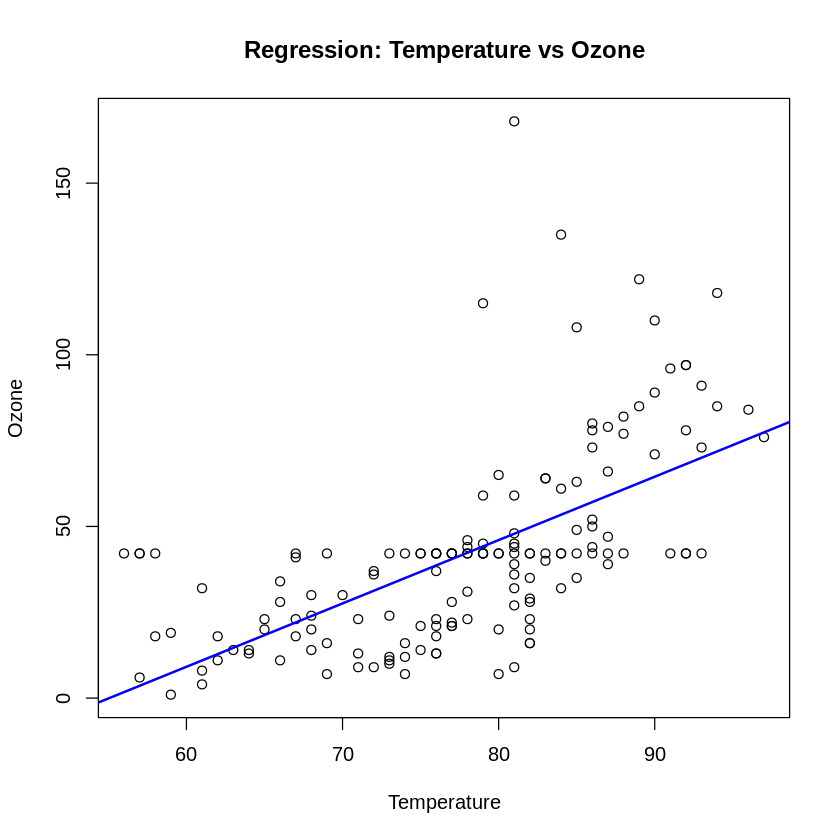

In [25]:
plot(data$Temp, data$Ozone,
     main = "Regression: Temperature vs Ozone",
     xlab = "Temperature",
     ylab = "Ozone")
abline(model, col = "blue", lwd = 2)